## Install Packages

In [1]:
# pyspark

!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=02014ac53b0e55db432a6758da62c84cd451fce2d8552e5623a271e566a372a5
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
!pip install -U textblob

In [3]:
!pip install tensorflow

In [4]:
!pip install gensim

In [5]:
!pip install wordcloud

In [6]:
!pip install plotly

In [7]:
!pip install statsmodels

In [8]:
!pip install scikit-learn

## Import Libraries

In [1]:
# - - - - - - - - - - - - - - - - - spark - - - - - - - - - - - - - -

from pyspark.sql import SparkSession

# - - - - - - - - - - - - - - - - - base - - - - - - - - - - - - - -

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# - - - - - - - - - - - - - - - - - nlp - - - - - - - - - - - - - -

import gensim
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

# - - - - - - - - - - - - - - - - - Machine Learning Model - - - - - - - - - - - - - -

import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from sklearn.metrics import confusion_matrix


## Create Spark

In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName('ProjectTweets').getOrCreate()

In [11]:
# spark

spark

## Viewing Data

In [13]:
# Assuming you have a CSV file, you can read it into a DataFrame
file_path = '/content/ProjectTweets.csv'  # Replace with the actual path to your dataset
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the DataFrame
df.show()

+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  0|1467810369|Mon Apr 06 22:19:45 PDT 2009|NO_QUERY|_TheSpecialOne_|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|
+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  1|1467810672|        Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|                                                                                               is upset that he ...|
|  2|1467810917|        Mon Apr 06 22:19:...|NO_QUERY|       mattycus|                                                                                               @Kenichan I dived...|
|  3|1467811184|        Mon Apr 06 22:19:...|NO_QUERY|        Ell

In [14]:
df.show(1)

+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  0|1467810369|Mon Apr 06 22:19:45 PDT 2009|NO_QUERY|_TheSpecialOne_|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|
+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  1|1467810672|        Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|                                                                                               is upset that he ...|
+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
only showing top 1 row



schema and column names

In [15]:
df.columns


['0',
 '1467810369',
 'Mon Apr 06 22:19:45 PDT 2009',
 'NO_QUERY',
 '_TheSpecialOne_',
 "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]

In [16]:
df.printSchema()

root
 |-- 0: integer (nullable = true)
 |-- 1467810369: long (nullable = true)
 |-- Mon Apr 06 22:19:45 PDT 2009: string (nullable = true)
 |-- NO_QUERY: string (nullable = true)
 |-- _TheSpecialOne_: string (nullable = true)
 |-- @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D: string (nullable = true)



In [17]:
df.collect()

[Row(0=1, 1467810369=1467810672, Mon Apr 06 22:19:45 PDT 2009='Mon Apr 06 22:19:49 PDT 2009', NO_QUERY='NO_QUERY', _TheSpecialOne_='scotthamilton', @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D="is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"),
 Row(0=2, 1467810369=1467810917, Mon Apr 06 22:19:45 PDT 2009='Mon Apr 06 22:19:53 PDT 2009', NO_QUERY='NO_QUERY', _TheSpecialOne_='mattycus', @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D='@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'),
 Row(0=3, 1467810369=1467811184, Mon Apr 06 22:19:45 PDT 2009='Mon Apr 06 22:19:57 PDT 2009', NO_QUERY='NO_QUERY', _TheSpecialOne_='ElleCTF', @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D='my whole

In [18]:
df.take(1)

[Row(0=1, 1467810369=1467810672, Mon Apr 06 22:19:45 PDT 2009='Mon Apr 06 22:19:49 PDT 2009', NO_QUERY='NO_QUERY', _TheSpecialOne_='scotthamilton', @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D="is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!")]

## Convert PySpark DataFrame to Pandas

In [34]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_project = project.toPandas()

# Rename the columns
pandas_project.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'}, inplace=True)

# Display the Pandas DataFrame
print(pandas_project)

               0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0              1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1              2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2              3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3              4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4              5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
1599994  1599995  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  1599996  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  1599997  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  1599998  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  1599999  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
0          scotthamilton   
1               mattycus   
2                ElleCTF   
3                 Karol

In [35]:
project = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the DataFrame
df.show()


+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  0|1467810369|Mon Apr 06 22:19:45 PDT 2009|NO_QUERY|_TheSpecialOne_|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|
+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  1|1467810672|        Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|                                                                                               is upset that he ...|
|  2|1467810917|        Mon Apr 06 22:19:...|NO_QUERY|       mattycus|                                                                                               @Kenichan I dived...|
|  3|1467811184|        Mon Apr 06 22:19:...|NO_QUERY|        Ell

In [61]:
# Rename the columns
df = df.withColumnRenamed("_1", "target") \
       .withColumnRenamed("_2", "id") \
       .withColumnRenamed("_3", "date") \
       .withColumnRenamed("_4", "query") \
       .withColumnRenamed("_5", "username") \
       .withColumnRenamed("_6", "content")

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()



In [40]:
pandas_df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [51]:
#read dataset
project = pd.read_csv("ProjectTweets.csv", encoding = 'latin', header=None)

In [54]:
project = project.rename(columns={0: 'target', 1: 'ids', 2: 'date', 3: 'flag', 4: 'user', 5: 'text'})

In [4]:
project.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Dtypes

In [5]:
project.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

## Cheking Missing Values

In [6]:
project.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

## Shape

In [8]:
project.shape

(1600000, 6)

## Information about the dataset

In [9]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Data Visualization

<Axes: >

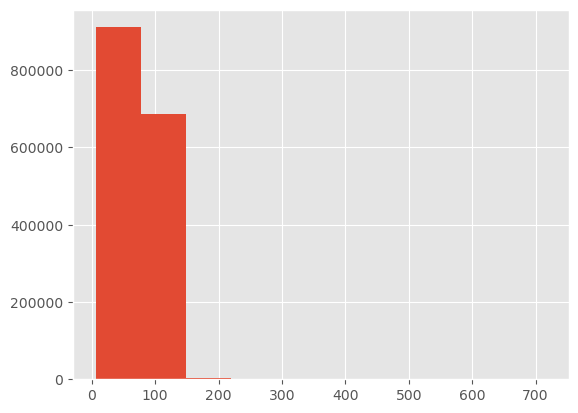

In [13]:
project['text'].str.len().hist()

<Axes: >

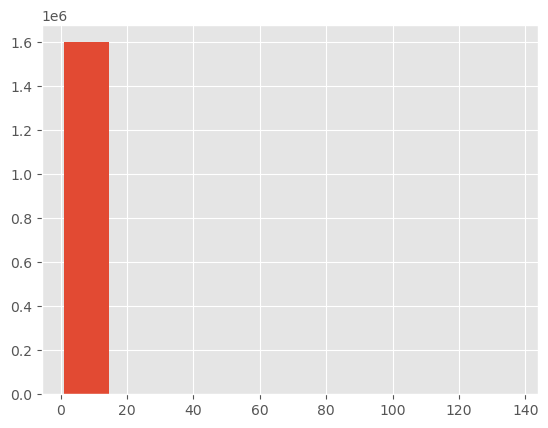

In [18]:
project['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tolga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

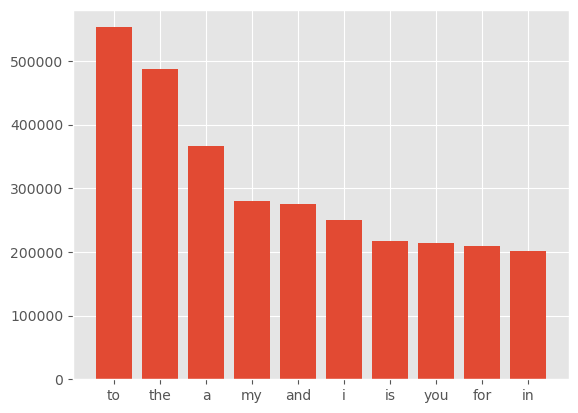

In [24]:
plot_top_stopwords_barchart(project['text'])

In [29]:
from nltk.corpus import stopwords
from collections import  Counter

In [30]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

c:\Users\tolga\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tolga\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tolga\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\tolga\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

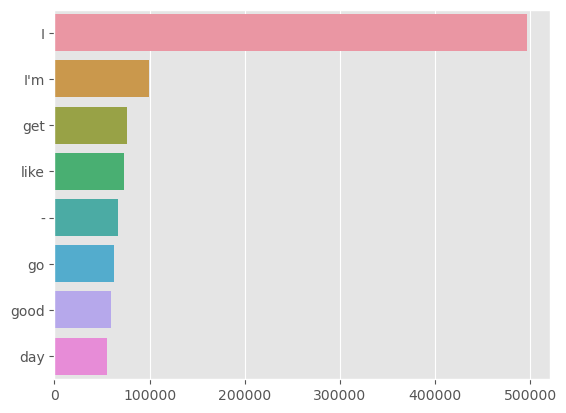

In [31]:
plot_top_non_stopwords_barchart(project['text'])

## World Cloud

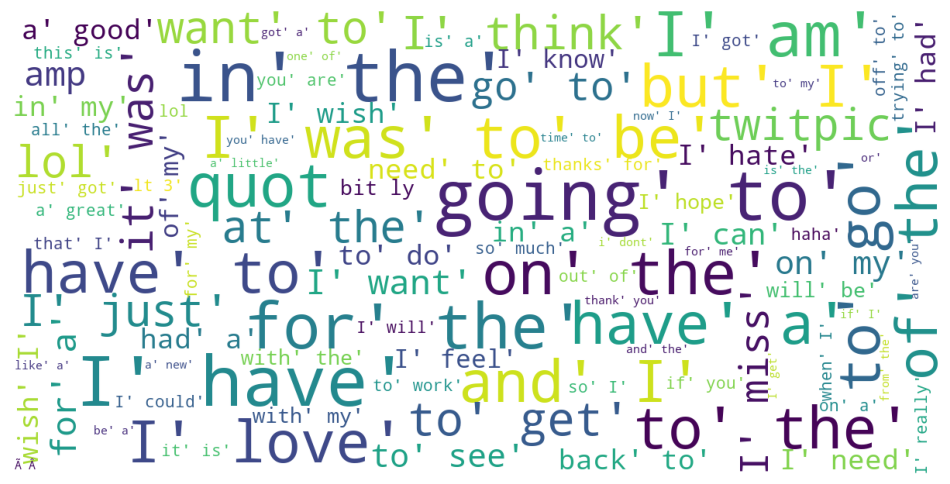

In [32]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

### Separating input feature and label

In [91]:
X=project.text
y=project.target

### Plot a cloud of words for negative tweets

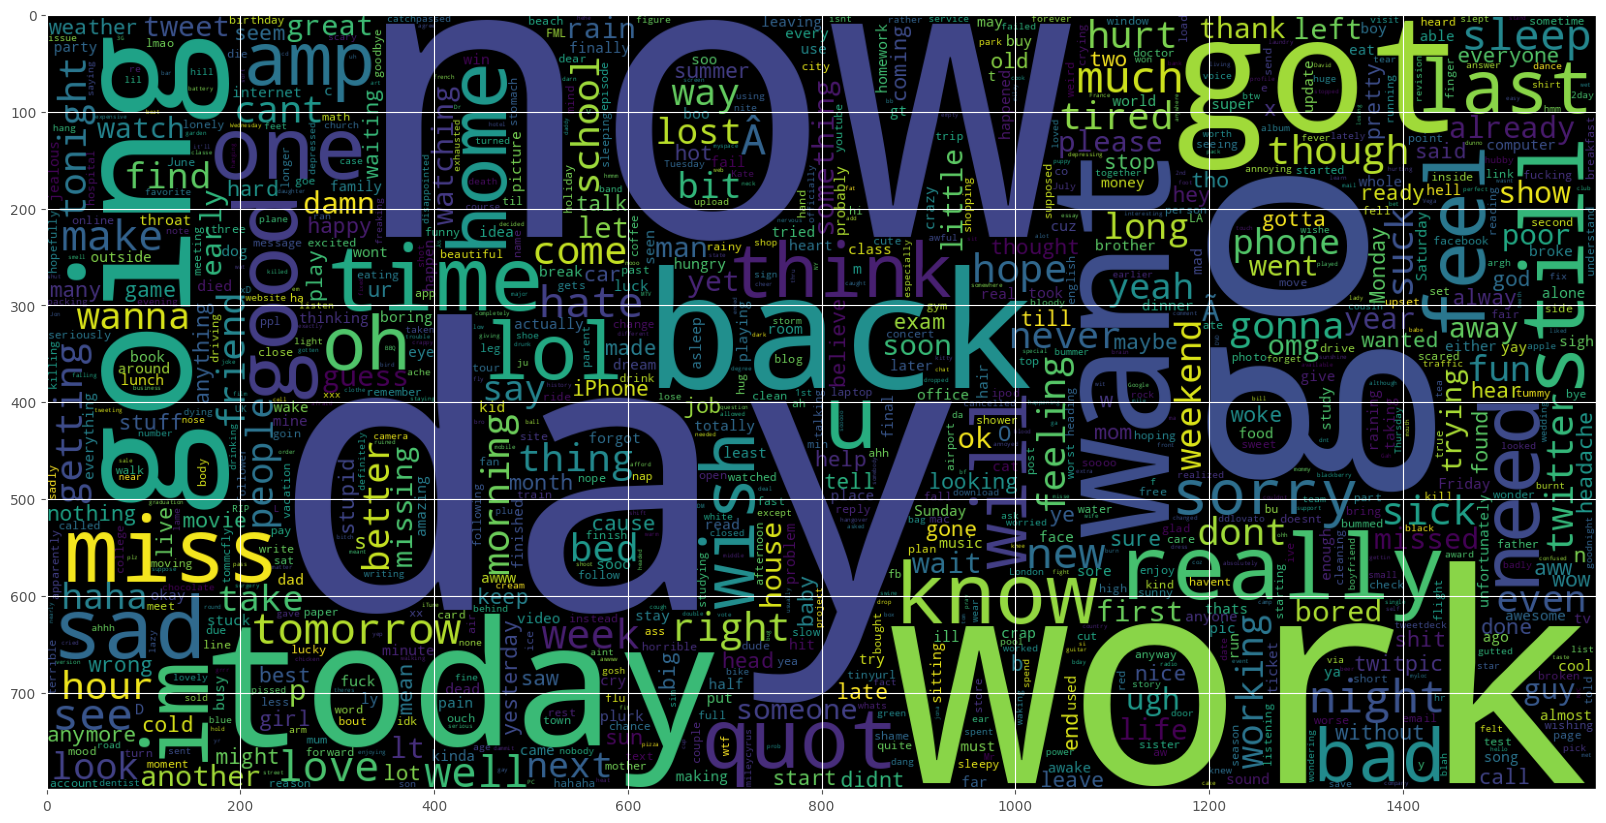

In [93]:
data_neg = project['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Plot a cloud of words for positive tweets

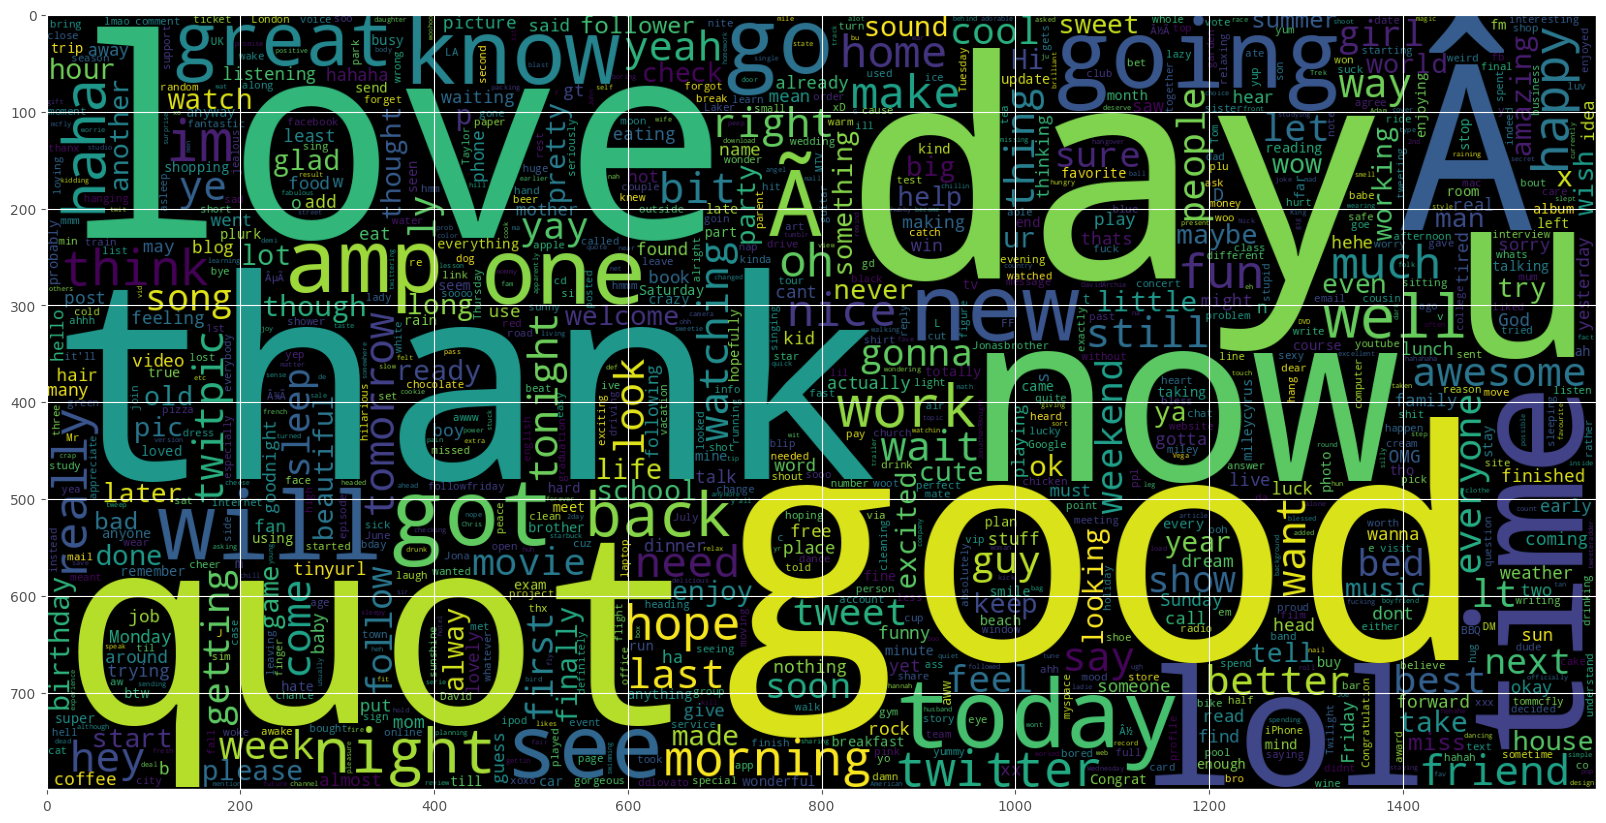

In [97]:
data_pos = project['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## Hastag Analysis

Top 10 Hashtags:
#followfriday: 2288
#fb: 1765
#squarespace: 867
#ff: 822
#seb-day: 498
#iranelection: 485
#: 472
#musicmonday: 397
#1: 391
#fail: 343


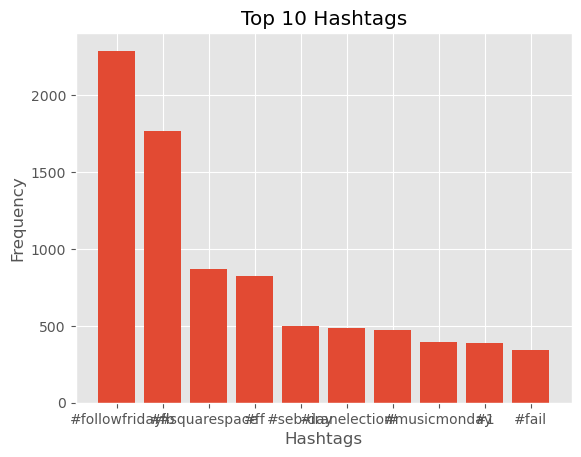

In [38]:
# Extract hashtags from the 'text' column
def extract_hashtags_from_text(text):
    words = text.split()
    return [word.lower() for word in words if word.startswith("#")]

# Apply the function to the 'text' column
project['hashtags'] = project['text'].apply(extract_hashtags_from_text)

# Flatten the list of hashtags
all_hashtags = [tag for sublist in project['hashtags'].tolist() for tag in sublist]

# Analyze and plot hashtag frequencies
top_n = 10
hashtag_counts = Counter(all_hashtags)
top_hashtags = dict(hashtag_counts.most_common(top_n))

# Display the list of hashtags and their frequencies
print("Top {} Hashtags:".format(top_n))
for hashtag, frequency in top_hashtags.items():
    print(f"{hashtag}: {frequency}")

# Plot the hashtag frequencies
plt.bar(top_hashtags.keys(), top_hashtags.values())
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top {} Hashtags'.format(top_n))
plt.show()

## Preprocessing Dataset

### Encoding

In [55]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [59]:
temp = []
#Splitting pd.Series to list
data_to_list = project["text"].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

[' - Awww, thats a bummer. You shoulda got David Carr of Third Day to do it. ;D',
 'is upset that he cant update his Facebook by texting it... and might cry as a result School today also. Blah!',
 'I dived many times for the ball. Managed to save 50% The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 'no, its not behaving at all. im mad. why am i here? because I cant see you all over there. ']

In [60]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        

data_words = list(sent_to_words(temp))
print(data_words[:10],'\n')

[['awww', 'thats', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it'], ['is', 'upset', 'that', 'he', 'cant', 'update', 'his', 'facebook', 'by', 'texting', 'it', 'and', 'might', 'cry', 'as', 'result', 'school', 'today', 'also', 'blah'], ['dived', 'many', 'times', 'for', 'the', 'ball', 'managed', 'to', 'save', 'the', 'rest', 'go', 'out', 'of', 'bounds'], ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire'], ['no', 'its', 'not', 'behaving', 'at', 'all', 'im', 'mad', 'why', 'am', 'here', 'because', 'cant', 'see', 'you', 'all', 'over', 'there'], ['not', 'the', 'whole', 'crew'], ['need', 'hug'], ['hey', 'long', 'time', 'no', 'see', 'yes', 'rains', 'bit', 'only', 'bit', 'lol', 'im', 'fine', 'thanks', 'hows', 'you'], ['nope', 'they', 'didnt', 'have', 'it'], ['que', 'me', 'muera']] 



In [61]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['awww thats bummer you shoulda got david carr of third day to do it', 'is upset that he cant update his facebook by texting it and might cry as result school today also blah', 'dived many times for the ball managed to save the rest go out of bounds', 'my whole body feels itchy and like its on fire', 'no its not behaving at all im mad why am here because cant see you all over there']


## Sentiment Analysis

In [33]:
def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tolga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


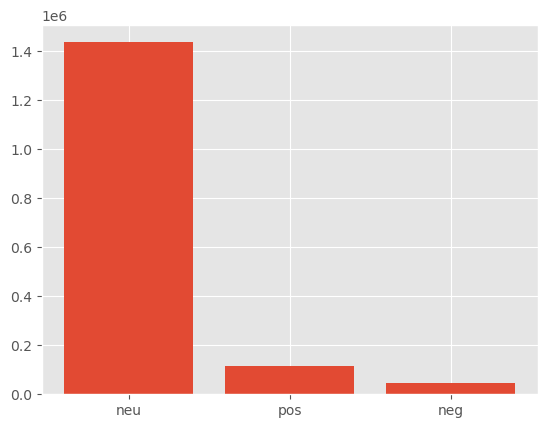

In [34]:
plot_sentiment_barchart(project['text'], method='Vader')

In [40]:
project['sentiment'] = project['text'].apply(lambda x: sentiment_textblob(x))
project.head(10)

,target,ids,date,flag,user,text,hashtags,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],pos
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,[],neu
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,[],pos
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,[],pos
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",[],neg
5,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,[],pos
6,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,[],neu
7,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,[],pos
8,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,[],neu
9,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,[],neu


## Time Series

In [42]:
!pip install statsmodels

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
from nltk.corpus import stopwords as nltk_stopwords 

In [ ]:
# Convert the 'date' column to datetime format
project['date'] = pd.to_datetime(project['date'])

In [ ]:
# Set the 'date' column as the index
project.set_index('date', inplace=True)

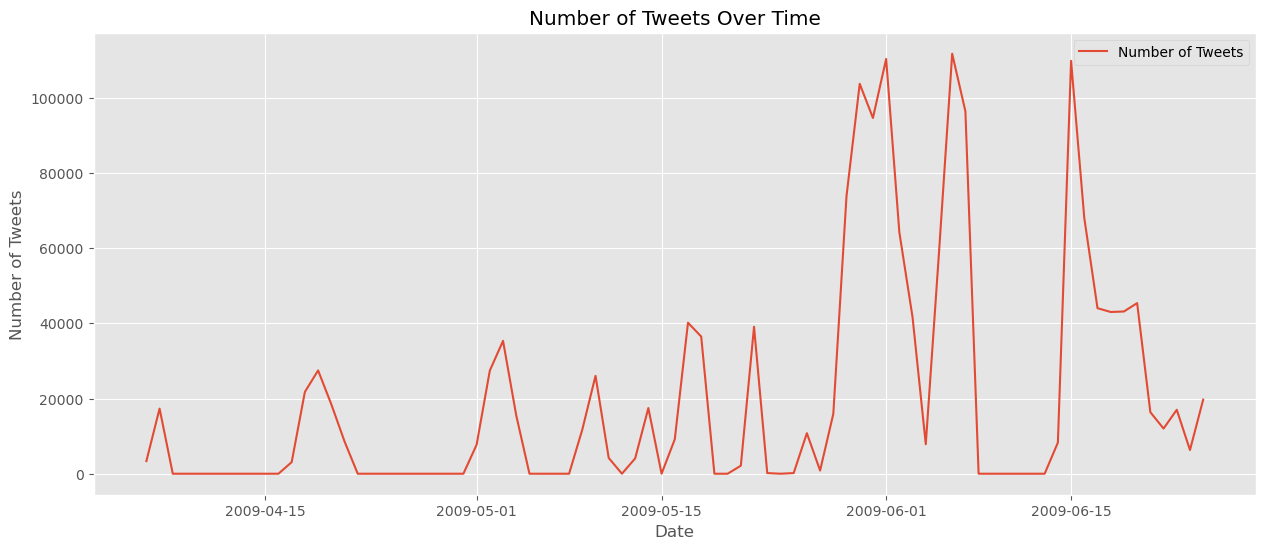

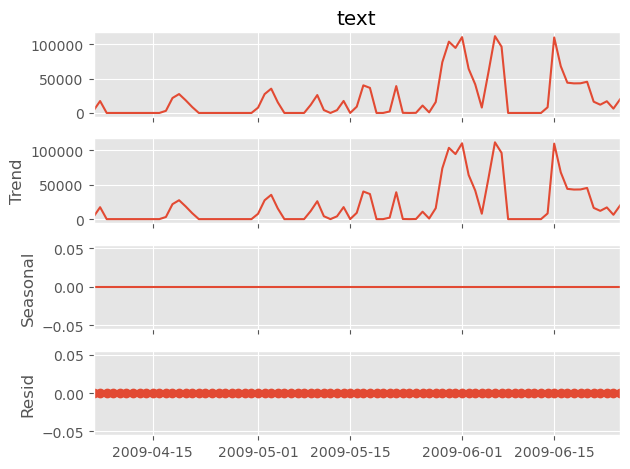

In [62]:
# Resample the data to a specific time frequency (e.g., daily)
df_resampled = project.resample('D').count()

# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['text'], label='Number of Tweets')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df_resampled['text'], model='additive', period=1)
result.plot()
plt.show()

# Create a word cloud from the tweet text
text = ' '.join(project['text'].dropna())
stop_words = set(nltk_stopwords.words('english'))  # Use the renamed import
#tokens = word_tokenize('text')
#filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

### Text Classification

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Handle missing values in the 'text' column
project = project.dropna(subset=['text'])



# Assuming your dataset has 'text' column for tweets and 'label' column for sentiment
X = project['text']
y = project['target']  # 'label' should be the target variable you want to predict

# Split the dataset into training and testing sets with a smaller test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Check if the training set is not empty
if len(X_train) == 0:
    raise ValueError("The resulting training set is empty. Adjust test_size or use a larger dataset.")

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset
X_train_tfidf = vectorizer.fit_transform(X_train.astype('U'))  # Convert to Unicode to handle potential non-string values
X_test_tfidf = vectorizer.transform(X_test.astype('U'))

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')